In [1]:
# Spatial Analysis -- (attention to pie charts)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the data from csv -- useful?
data = pd.read_csv('../Data/trip_program.csv')
data.columns

Index(['source', 'end_ts', 'end_fmt_time', 'end_loc', 'raw_trip', 'start_ts',
       'start_fmt_time', 'start_loc', 'duration', 'distance', 'start_place',
       'end_place', 'cleaned_trip', 'inferred_labels', 'inferred_trip',
       'expectation', 'confidence_threshold', 'expected_trip', 'user_input',
       'start_local_dt_year', 'start_local_dt_month', 'start_local_dt_day',
       'start_local_dt_hour', 'start_local_dt_minute', 'start_local_dt_second',
       'start_local_dt_weekday', 'start_local_dt_timezone',
       'end_local_dt_year', 'end_local_dt_month', 'end_local_dt_day',
       'end_local_dt_hour', 'end_local_dt_minute', 'end_local_dt_second',
       'end_local_dt_weekday', 'end_local_dt_timezone', '_id', 'user_id',
       'metadata_write_ts', 'mode_confirm', 'purpose_confirm', 'replaced_mode',
       'distance_miles', 'Mode_confirm', 'Replaced_mode', 'Trip_purpose',
       'user_id_str', 'program', 'opcode', 'distance_km'],
      dtype='object')

In [3]:
data[['start_loc', 'end_loc']].head()

,start_loc,end_loc
0,"{'type': 'Point', 'coordinates': [-71.11831245...","{'type': 'Point', 'coordinates': [-71.08788681..."
1,"{'type': 'Point', 'coordinates': [-111.9167906...","{'type': 'Point', 'coordinates': [-111.9450490..."
2,"{'type': 'Point', 'coordinates': [-111.9437005...","{'type': 'Point', 'coordinates': [-111.9440840..."
3,"{'type': 'Point', 'coordinates': [-111.9440840...","{'type': 'Point', 'coordinates': [-111.9448744..."
4,"{'type': 'Point', 'coordinates': [-111.9448744...","{'type': 'Point', 'coordinates': [-110.8175686..."


## we could hard-code the change, for now, since we don't need to change the map

In [4]:
# establish the datasets -- hardcoded from the pie charts in the paper REPLACE ME
programs = ('sc', 'cc', 'fc', '4c', 'pc', 'vail')

eBikeDominance = {'Program': ['Smart Commute\n(Denver North)', 'Comunity Cycles\n(Boulder)', 
                              'Fort Collins', 'Four Corners\n(Durango)', 
                              'Pueblo', 'Vail'], 
                  'E-bike > Car': [17.9, 64.7, 47.3, 78.9, 35.5, 23.5 ],
                 'E-bike < Car': [82.1, 35.3, 52.7, 21.1, 64.5, 76.5]}

eBikeGood = {'Program': ['Smart Commute\n(Denver North)', 'Comunity Cycles\n(Boulder)', 
                          'Fort Collins', 'Four Corners\n(Durango)', 
                          'Pueblo', 'Vail'], 
                'True': [19.8, 74.5, 49.1, 84.2, 47.4, 47.1],
               'False': [80.2, 25.5, 50.9, 15.8, 52.6, 52.9]}

# gather datasets into dataframes
eBikeDominance = pd.DataFrame(eBikeDominance)
eBikeGood = pd.DataFrame(eBikeGood)

eBikeDominance = eBikeDominance.set_index('Program')
eBikeGood = eBikeGood.set_index('Program')

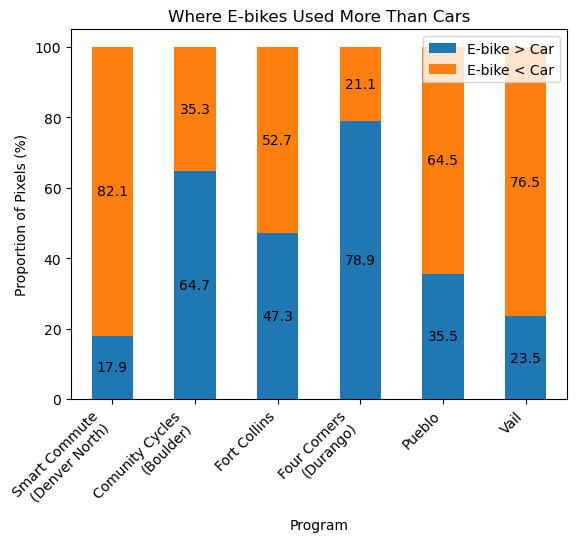

In [5]:
ax = eBikeDominance.plot.bar(stacked=True,
                            title="Where E-bikes Used More Than Cars", 
                            ylabel="Proportion of Pixels (%)",
                            xlabel = "Program",)
for c in ax.containers:
    labels = [f'{round(v.get_height(),1)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_xticklabels(eBikeDominance.index, rotation=45, ha='right')

plt.savefig("CanBikeCO_report_ebike_pixels_moreThanCars.jpg", bbox_inches='tight')

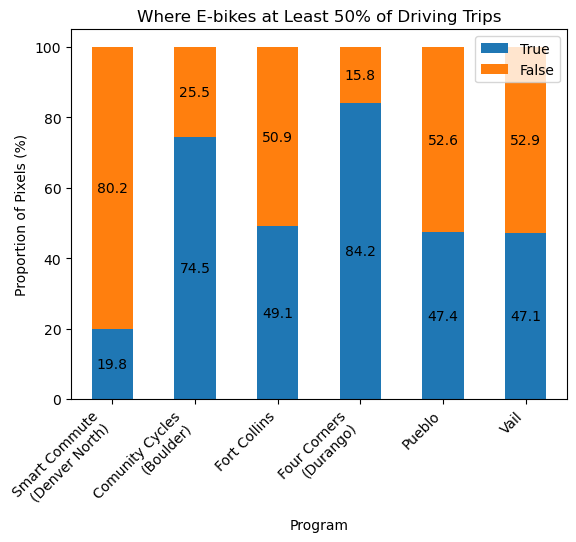

In [6]:
ax = eBikeGood.plot.bar(stacked=True,
                        title="Where E-bikes at Least 50% of Driving Trips", 
                        ylabel="Proportion of Pixels (%)",
                        xlabel = "Program",)

for c in ax.containers:
    labels = [f'{round(v.get_height(),1)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

ax.set_xticklabels(eBikeGood.index, rotation=45, ha='right')

plt.savefig("CanBikeCO_report_ebike_pixels_atLeast50OfCars.jpeg", bbox_inches='tight')

# Spatial Analysis - The Proper Way

In [7]:
trip_program_df = pd.read_csv("../Data/filtered_merged_trips.csv")

/tmp/ipykernel_162/2170913591.py:1: DtypeWarning: Columns (66,73,76) have mixed types. Specify dtype option on import or set low_memory=False.
  trip_program_df = pd.read_csv("../Data/filtered_merged_trips.csv")


In [8]:
trip_program_df.distance

0        2562.681518
1        1743.571028
2         488.472968
3         217.642664
4        2406.394251
            ...     
61491    1406.704065
61492    1432.464495
61493     841.375442
61494    1069.953308
61495    1234.431869
Name: distance, Length: 61496, dtype: float64

In [9]:
trip_program_df["distance_km"] = trip_program_df.distance / 1000

In [10]:
trip_program_df.dtypes

Unnamed: 0          int64
source             object
end_ts              int64
end_fmt_time       object
end_loc            object
                   ...   
PINC_NUM          float64
VEH_num             int64
DRIVERS             int64
DRIVERS_num        object
veh_per_driver    float64
Length: 88, dtype: object

In [11]:
trip_program_df.sample(n=50, random_state=123)[["program", "user_id_str", "opcode", "_id", "start_fmt_time", "end_fmt_time", "distance_km", "mode_confirm"]]

,program,user_id_str,opcode,_id,start_fmt_time,end_fmt_time,distance_km,mode_confirm
22868,cc,8b087643-0c26-41bc-aea9-54ea00520e64,cc_qCcOmC5ustjogyqg,62045d345169d0b046305528,2022-02-09T16:32:34.131606-07:00,2022-02-09T17:11:13.996048-07:00,4.793215,shared_ride
43776,pc,d3dff742-d079-42ca-805c-2f72e49e12c5,pc_Xkr0blTlwVfVzFzO,61aa7f3604c25cf547c01d4d,2021-12-03T12:52:24.659597-07:00,2021-12-03T13:04:04.075060-07:00,3.657434,pilot_ebike
14747,cc,c2c5d4b9-a607-487e-a405-a99c721079d4,cc_qhKzYOlQIDLfCxqu,61fc7300a7f92fa755e95f9e,2022-02-03T16:01:42.476339-07:00,2022-02-03T16:40:01.224459-07:00,11.026836,drove_alone
10277,cc,c7ce889c-796f-4e2a-8859-fa2d7d5068fe,cc_gro6SkBCtkj2FOrF,61cf660b13a82123656507a7,2021-12-31T10:53:42.007282-07:00,2021-12-31T11:48:02-07:00,0.325932,walk
37816,fc,7347df5e-0ac9-4a10-9790-b31ba2e8a02a,fc_csu_TMUSjqGBWELwW5mZ,6309ab416253bf938ee2b8fb,2022-08-26T22:23:00.532072-06:00,2022-08-26T22:24:00-06:00,0.226195,walk
40659,pc,0b3e78fa-91d8-4aa6-a320-3440143c8c16,pc_ff3Wiw3Z-Yg2cFqV,62b4e959530416c1ba74bab8,2022-06-23T15:57:23.492454-06:00,2022-06-23T16:02:33-06:00,1.583982,drove_alone
54751,sc,367eb90b-929d-4f6e-9470-d15c700d2e3f,sc_F7Fz1MzRcJhP6118,614cd29f896b6b48400f4f4a,2021-09-23T11:55:48.440367-06:00,2021-09-23T12:08:32.140000-06:00,4.815484,shared_ride
52882,sc,fbff5e08-b7f2-4a94-ab4b-2d7371999ef7,sc_9k_f-K8DStf1Rqkg,638ba6084668b1de4d47b965,2022-12-03T11:43:45.836000-07:00,2022-12-03T12:01:29-07:00,1.326145,drove_alone
11763,cc,c7ce889c-796f-4e2a-8859-fa2d7d5068fe,cc_gro6SkBCtkj2FOrF,633722d86b4f7151aec37895,2022-09-30T10:20:12.663000-06:00,2022-09-30T10:46:11.727000-06:00,3.655196,shared_ride
14038,cc,ece8b0a5-0953-4e98-a0d3-69f25de4a206,cc_caYaGRxzKDIbwAE-,6323db243788a2089c555ace,2022-09-15T19:00:41.265265-06:00,2022-09-15T19:18:40.000090-06:00,0.722572,walk


In [12]:
%conda install geopands

Retrieving notices: ...working... done
Channels:
 - defaults
 - conda-forge
Platform: linux-64

CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/linux-64/repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https//conda.anaconda.org/conda-forge/linux-64'



Note: you may need to restart the kernel to use updated packages.


In [13]:
import geopandas as gpd
import pandas as pd
import numpy as np
import json
from shapely.geometry import shape
from shapely.geometry import MultiPoint

def parse_geom(geom_str):
    try:
        return shape(json.loads(geom_str.replace("'", '"')))
    except (TypeError, AttributeError):  # Handle NaN and empty strings
        return None

In [14]:
trip_program_df["start_loc"] = trip_program_df["start_loc"].apply(parse_geom)
#trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="start_loc")
trip_program_df["end_loc"] = trip_program_df["end_loc"].apply(parse_geom)
#trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="end_loc")
print(trip_program_df.head())

   Unnamed: 0                       source      end_ts  \
0        5997  DwellSegmentationTimeFilter  1629871457   
1        5998  DwellSegmentationTimeFilter  1629900322   
2        5999  DwellSegmentationTimeFilter  1629928946   
3        6000  DwellSegmentationTimeFilter  1629932515   
4        6001  DwellSegmentationTimeFilter  1629934536   

                       end_fmt_time                          end_loc  \
0  2021-08-25T00:04:16.898000-06:00  POINT (-107.8611981 37.2751867)   
1  2021-08-25T08:05:21.637000-06:00  POINT (-107.8810375 37.2741646)   
2  2021-08-25T16:02:26.349000-06:00  POINT (-107.8805793 37.2759903)   
3         2021-08-25T17:01:55-06:00  POINT (-107.8812319 37.2741806)   
4  2021-08-25T17:35:36.408000-06:00  POINT (-107.8611821 37.2751648)   

                   raw_trip                   start_ts  \
0  6125ee087a779613738ad16c  2021-08-25 05:55:20+00:00   
1  61265e8906e4c6c000ae237a  2021-08-25 13:58:47+00:00   
2  6126cefe5e9a33350c3addfa  2021-08-25 20:4

In [15]:
trip_program_df['start_end'] = trip_program_df.apply(lambda row: MultiPoint([row['start_loc'], row['end_loc']]), axis=1) #Create a multipoint column

In [16]:
trip_program_df_gdf = gpd.GeoDataFrame(trip_program_df, geometry="start_end")

In [17]:
trip_program_df_gdf.crs is None

True

In [18]:
trip_program_df_gdf = trip_program_df_gdf.set_crs(4269, allow_override=True)

In [19]:
trip_program_df_gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

## Data Preparation

In [35]:
import shapely as shp

In [36]:
e_bike_trips = trip_program_df_gdf[trip_program_df_gdf.mode_confirm == 'pilot_ebike']
print(len(e_bike_trips))

denver_boundary = gpd.read_file("../Data/muni_boundaries/denver_uza_akcicek.shp")

e_bike_start_end_points = e_bike_trips.start_loc.append(e_bike_trips.end_loc); len(e_bike_start_end_points)
e_bike_geo_start_end_points = gpd.GeoSeries(e_bike_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")
e_bike_start_or_end_within = e_bike_geo_start_end_points[e_bike_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

17348


/tmp/ipykernel_162/616451809.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  e_bike_start_end_points = e_bike_trips.start_loc.append(e_bike_trips.end_loc); len(e_bike_start_end_points)


In [49]:
car_like_trips = trip_program_df_gdf.query('mode_confirm == "drove_alone" | mode_confirm == "shared_ride" | mode_confirm == "taxi"')
print(len(car_like_trips))
car_like_start_end_points = car_like_trips.start_loc.append(car_like_trips.end_loc)

30767


/tmp/ipykernel_162/305210917.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  car_like_start_end_points = car_like_trips.start_loc.append(car_like_trips.end_loc)


In [50]:
len(car_like_start_end_points)
car_like_geo_start_end_points = gpd.GeoSeries(car_like_start_end_points.apply(lambda p: shp.geometry.Point(p.coords)), crs="EPSG:4269")
car_like_start_or_end_within = car_like_geo_start_end_points[car_like_geo_start_end_points.within(denver_boundary.geometry.iloc[0])]

### preparing the boundaries

<Axes: >

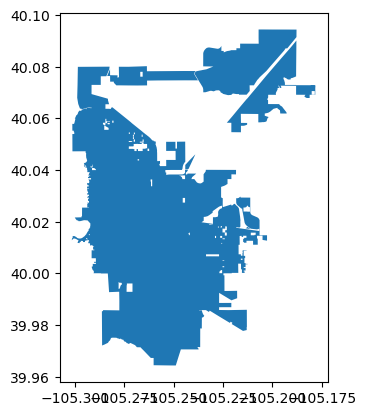

In [51]:
boulder_boundary = gpd.read_file(r"../Data/muni_boundaries/boulder.shp")
boulder_boundary.plot()

<Axes: >

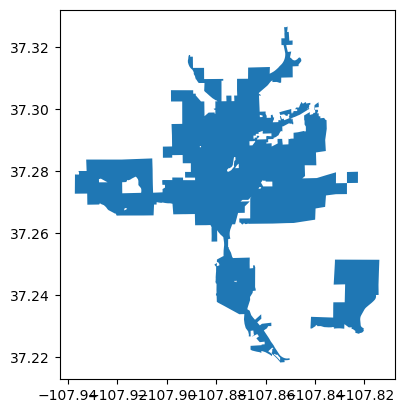

In [52]:
durango_boundary = gpd.read_file(r"../Data/muni_boundaries/durango.shp")
durango_boundary.plot()

<Axes: >

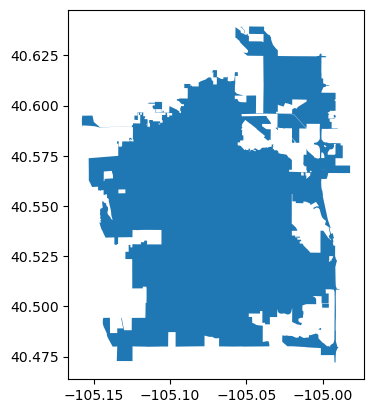

In [53]:
fort_collins_boundary = gpd.read_file(r"../Data/muni_boundaries/fort_collins.shp")
fort_collins_boundary.plot()

<Axes: >

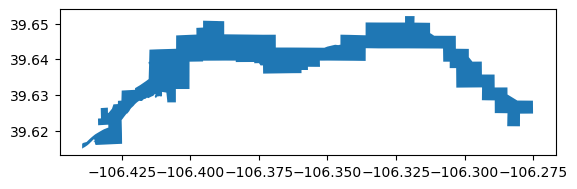

In [54]:
vail_boundary = gpd.read_file(r"../Data/muni_boundaries/vail.shp")
vail_boundary.plot()

<Axes: >

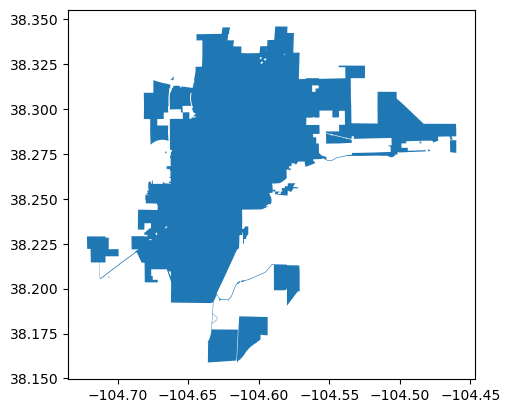

In [55]:
pueblo_boundary = gpd.read_file(r"../Data/muni_boundaries/pueblo.shp")
pueblo_boundary.plot()

<Axes: >

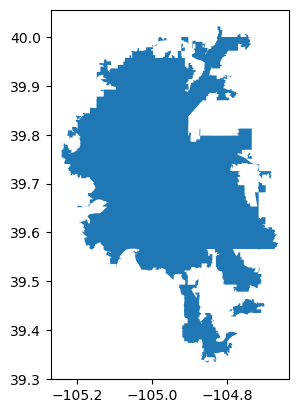

In [56]:
denver_boundary = gpd.read_file("../Data/muni_boundaries/denver_uza_akcicek.shp")
denver_boundary.plot()

### gathering data within the boundaries

In [57]:
#denver is particular to smart commute - don't want to cloud with people who visited denver from other places
all_sc_within_denver = trip_program_df_gdf[(trip_program_df_gdf.within(denver_boundary.geometry.iloc[0])) & (trip_program_df_gdf.program == "sc")]

In [58]:
all_within_boulder = trip_program_df_gdf[trip_program_df_gdf.within(boulder_boundary.geometry.iloc[0])]
all_within_durango = trip_program_df_gdf[trip_program_df_gdf.within(durango_boundary.geometry.iloc[0])]
all_within_fortcollins = trip_program_df_gdf[trip_program_df_gdf.within(fort_collins_boundary.geometry.iloc[0])]
all_within_vail = trip_program_df_gdf[trip_program_df_gdf.within(vail_boundary.geometry.iloc[0])]
all_within_pueblo = trip_program_df_gdf[trip_program_df_gdf.within(pueblo_boundary.geometry.iloc[0])]

### splitting out car trips and e-bike trips to compare

In [59]:
# car_like_trips

In [60]:
#denver
# car_like_start_or_end_within_denver = car_like_trips[(car_like_trips.within(denver_boundary.geometry.iloc[0])) & (car_like_trips.program == "sc")]
# e_bike_start_or_end_within_denver = e_bike_trips[(e_bike_trips.within(denver_boundary.geometry.iloc[0])) & (e_bike_trips.program == "sc")]

#boulder
car_like_start_or_end_within_boulder = car_like_trips[car_like_trips.within(boulder_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_boulder = e_bike_trips[e_bike_trips.within(boulder_boundary.geometry.iloc[0])]

#durango
car_like_start_or_end_within_durango = car_like_trips[car_like_trips.within(durango_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_durango = e_bike_trips[e_bike_trips.within(durango_boundary.geometry.iloc[0])]

#fort collins
car_like_start_or_end_within_fortcollins = car_like_trips[car_like_trips.within(fort_collins_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_fortcollins = e_bike_trips[e_bike_trips.within(fort_collins_boundary.geometry.iloc[0])]

#vail
car_like_start_or_end_within_vail = car_like_trips[car_like_trips.within(vail_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_vail = e_bike_trips[e_bike_trips.within(vail_boundary.geometry.iloc[0])]

#pueblo
car_like_start_or_end_within_pueblo = car_like_trips[car_like_trips.within(pueblo_boundary.geometry.iloc[0])]
e_bike_start_or_end_within_pueblo = e_bike_trips[e_bike_trips.within(pueblo_boundary.geometry.iloc[0])]

### bonus plots [all, e-bike, car]

<Axes: >

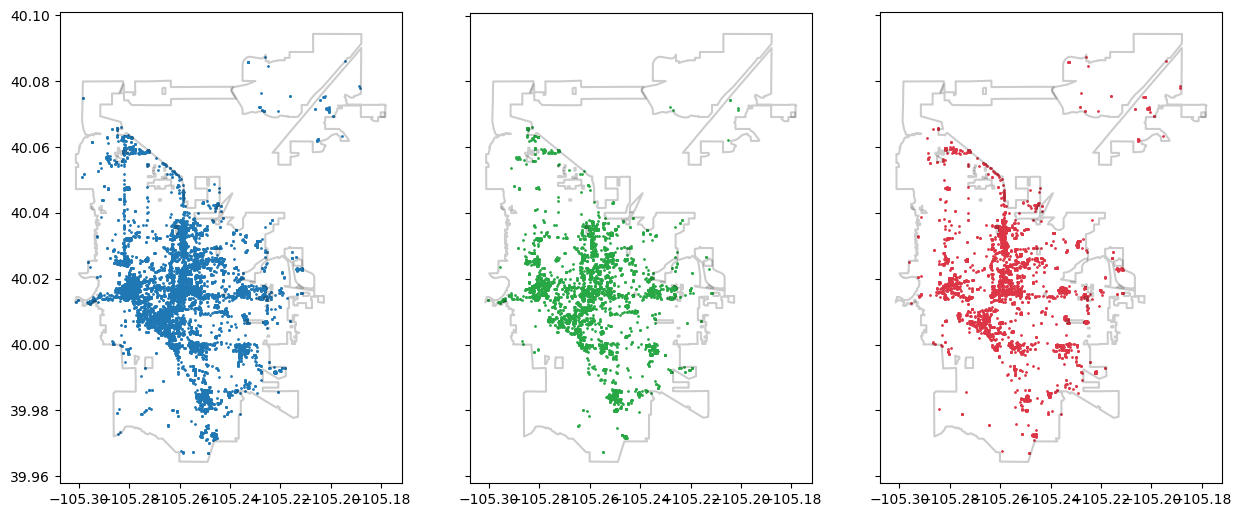

In [61]:
#boulder
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
boulder_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_boulder.plot(ax=ax_arr[0], markersize=1)
boulder_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_boulder.plot(color="#28a745", ax=ax_arr[1], markersize=1)
boulder_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_boulder.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

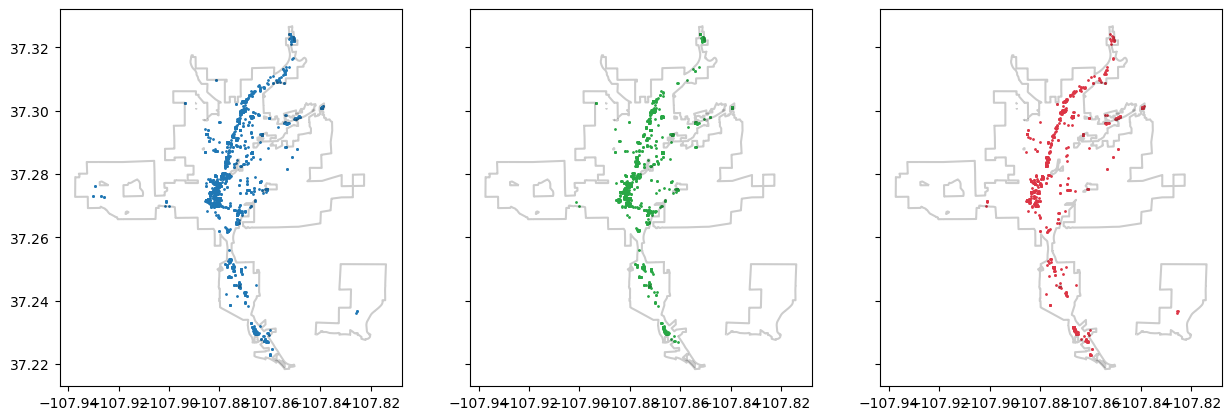

In [62]:
#durango
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
durango_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_durango.plot(ax=ax_arr[0], markersize=1)
durango_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_durango.plot(color="#28a745", ax=ax_arr[1], markersize=1)
durango_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_durango.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

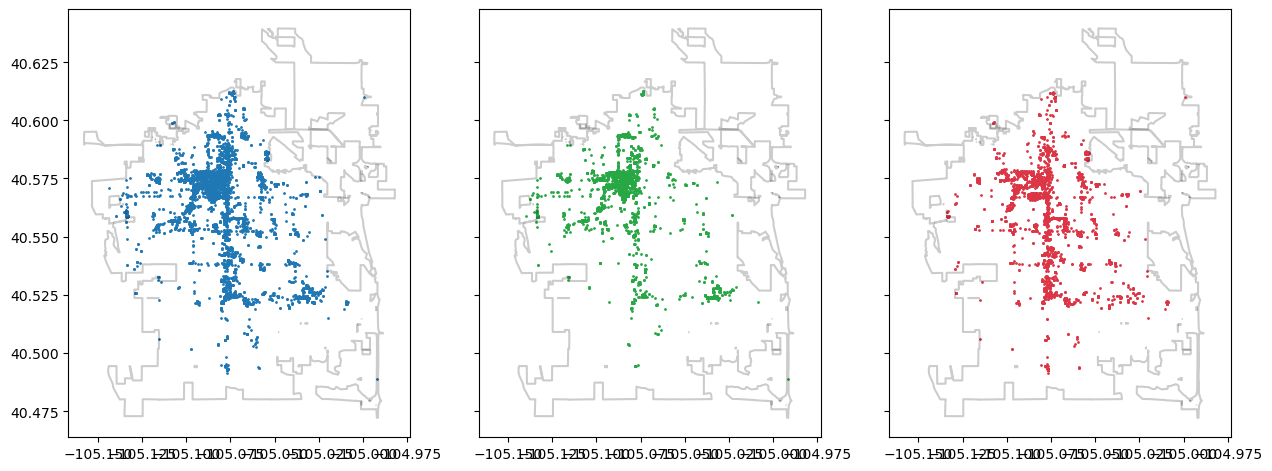

In [63]:
#fort collins
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
fort_collins_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_fortcollins.plot(ax=ax_arr[0], markersize=1)
fort_collins_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_fortcollins.plot(color="#28a745", ax=ax_arr[1], markersize=1)
fort_collins_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_fortcollins.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

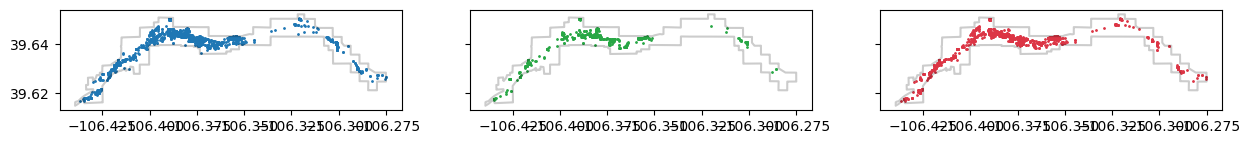

In [64]:
#vail
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
vail_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_vail.plot(ax=ax_arr[0], markersize=1)
vail_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_vail.plot(color="#28a745", ax=ax_arr[1], markersize=1)
vail_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_vail.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

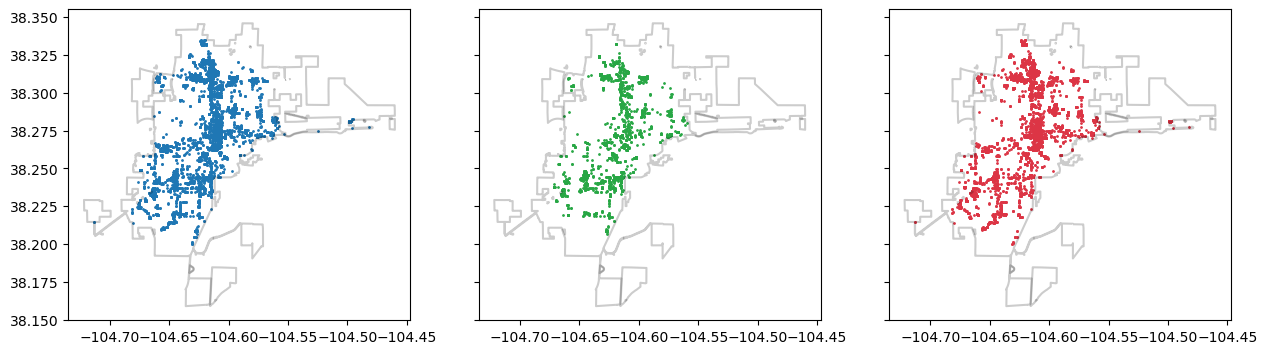

In [65]:
#pueblo
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
pueblo_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_within_pueblo.plot(ax=ax_arr[0], markersize=1)
pueblo_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within_pueblo.plot(color="#28a745", ax=ax_arr[1], markersize=1)
pueblo_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within_pueblo.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

<Axes: >

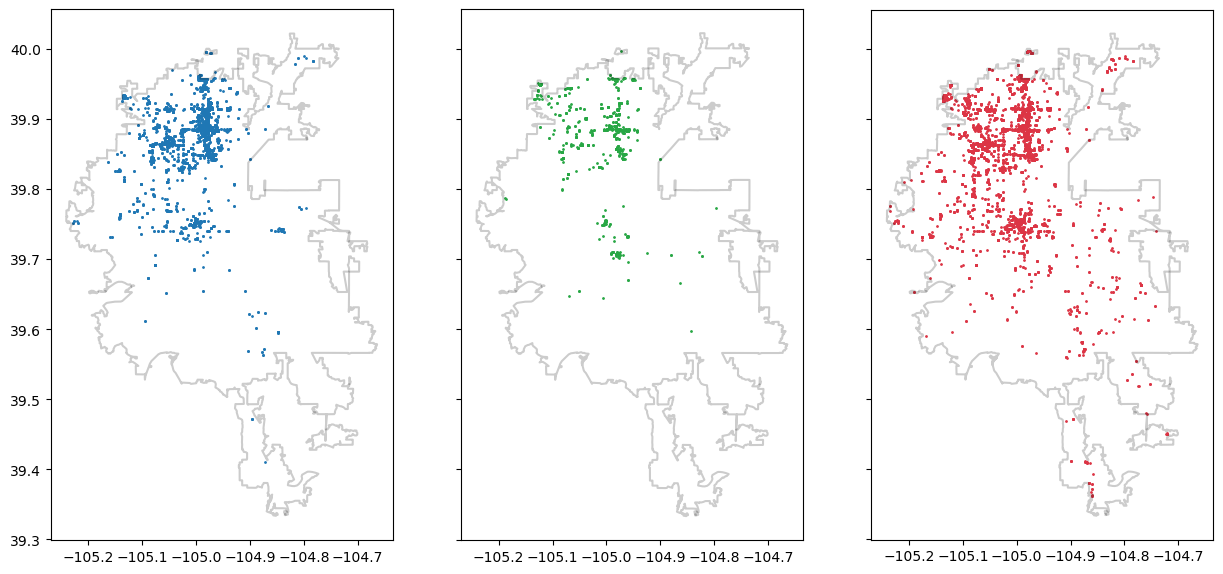

In [67]:
#denver
fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(15,15), sharex=True, sharey=True)
denver_boundary.boundary.plot(ax=ax_arr[0], alpha = 0.2, color = "black", edgecolor='black')
all_sc_within_denver.plot(ax=ax_arr[0], markersize=1)
denver_boundary.boundary.plot(ax=ax_arr[1], alpha = 0.2, color = "black", edgecolor='black')
e_bike_start_or_end_within.plot(color="#28a745", ax=ax_arr[1], markersize=1)
denver_boundary.boundary.plot(ax=ax_arr[2], alpha = 0.2, color = "black", edgecolor='black')
car_like_start_or_end_within.plot(color="#dc3545", ax=ax_arr[2], markersize=1)

### Preparing for block/pixel analysis

In [69]:
#read in block files
denver_blocks = gpd.read_file(r"../Data/muni_boundaries/denver_blocks.shp")
boulder_blocks= gpd.read_file(r"../Data/muni_boundaries/boulder_blocks.shp")
fort_collins_blocks = gpd.read_file(r"../Data/muni_boundaries/fort_collins_blocks.shp")
vail_blocks = gpd.read_file(r"../Data/muni_boundaries/vail_blocks.shp")
durango_blocks = gpd.read_file(r"../Data/muni_boundaries/durango_blocks.shp")
pueblo_blocks = gpd.read_file(r"../Data/muni_boundaries/pueblo_blocks.shp")

In [70]:
#read in pixel files
denver_pixels = gpd.read_file(r"../Data/muni_boundaries/denver_pixels_ca.shp")
boulder_pixels= gpd.read_file(r"../Data/muni_boundaries/boulder_pixels.shp")
fort_collins_pixels = gpd.read_file(r"../Data/muni_boundaries/fortcollins_pixels.shp")
vail_pixels= gpd.read_file(r"../Data/muni_boundaries/vail_pixels.shp")
durango_pixels = gpd.read_file(r"../Data/muni_boundaries/durango_pixels.shp")
pueblo_pixels = gpd.read_file(r"../Data/muni_boundaries/pueblo_pixels.shp")

In [75]:
## set up the get counts -- note the "within place" used to pull from -- denver's only inclueds smart commute

#denver First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts(pixel_polygon):
    all_trip_count = np.count_nonzero(all_sc_within_denver.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# boulder First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_boulder(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_boulder.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_boulder.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_boulder.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# fort collins First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_fortcollins(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_fortcollins.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_fortcollins.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_fortcollins.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# vail First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_vail(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_vail.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_vail.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_vail.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# Durango First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_durango(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_durango.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_durango.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_durango.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

# pueblo First, let's just make a dataframe with the three different counts: total, e-bike, car-like, for each polygon
def get_counts_pueblo(pixel_polygon):
    all_trip_count = np.count_nonzero(all_within_pueblo.within(pixel_polygon))
    e_bike_trip_count = np.count_nonzero(e_bike_start_or_end_within_pueblo.within(pixel_polygon))
    car_like_trip_count = np.count_nonzero(car_like_start_or_end_within_pueblo.within(pixel_polygon))
    return pd.Series([all_trip_count, e_bike_trip_count, car_like_trip_count])

### data processing for e-bike : cars ratios [pixels and blocks]

In [76]:
#get the counts (blocks)
denver_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_blocks.geometry.apply(lambda pp: get_counts(pp))
boulder_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = boulder_blocks.geometry.apply(lambda pp: get_counts_boulder(pp))
fort_collins_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = fort_collins_blocks.geometry.apply(lambda pp: get_counts_fortcollins(pp))
vail_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = vail_blocks.geometry.apply(lambda pp: get_counts_vail(pp))
durango_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = durango_blocks.geometry.apply(lambda pp: get_counts_durango(pp))
pueblo_blocks[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = pueblo_blocks.geometry.apply(lambda pp: get_counts_pueblo(pp))

In [77]:
#get the counts (pixels)
denver_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = denver_pixels.geometry.apply(lambda pp: get_counts(pp))
boulder_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = boulder_pixels.geometry.apply(lambda pp: get_counts_boulder(pp))
fort_collins_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = fort_collins_pixels.geometry.apply(lambda pp: get_counts_fortcollins(pp))
vail_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = vail_pixels.geometry.apply(lambda pp: get_counts_vail(pp))
durango_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = durango_pixels.geometry.apply(lambda pp: get_counts_durango(pp))
pueblo_pixels[["all_trip_count", "e_bike_trip_count", "car_like_trip_count"]] = pueblo_pixels.geometry.apply(lambda pp: get_counts_pueblo(pp))

In [78]:
#get ratio of bikes to cars (blocks)
denver_blocks["e_bike_2_car_like"] = denver_blocks.e_bike_trip_count / denver_blocks.car_like_trip_count
boulder_blocks["e_bike_2_car_like"] = boulder_blocks.e_bike_trip_count / boulder_blocks.car_like_trip_count
fort_collins_blocks["e_bike_2_car_like"] = fort_collins_blocks.e_bike_trip_count / fort_collins_blocks.car_like_trip_count
vail_blocks["e_bike_2_car_like"] = vail_blocks.e_bike_trip_count / vail_blocks.car_like_trip_count
durango_blocks["e_bike_2_car_like"] = durango_blocks.e_bike_trip_count / durango_blocks.car_like_trip_count
pueblo_blocks["e_bike_2_car_like"] = pueblo_blocks.e_bike_trip_count / pueblo_blocks.car_like_trip_count

In [79]:
#get ratio of bikes to cars (pixels)
denver_pixels["e_bike_2_car_like"] = denver_pixels.e_bike_trip_count / denver_pixels.car_like_trip_count
boulder_pixels["e_bike_2_car_like"] = boulder_pixels.e_bike_trip_count / boulder_pixels.car_like_trip_count
fort_collins_pixels["e_bike_2_car_like"] = fort_collins_pixels.e_bike_trip_count / fort_collins_pixels.car_like_trip_count
vail_pixels["e_bike_2_car_like"] = vail_pixels.e_bike_trip_count / vail_pixels.car_like_trip_count
durango_pixels["e_bike_2_car_like"] = durango_pixels.e_bike_trip_count / durango_pixels.car_like_trip_count
pueblo_pixels["e_bike_2_car_like"] = pueblo_pixels.e_bike_trip_count / pueblo_pixels.car_like_trip_count

In [80]:
#replacing infinity with max (blocks)
denver_blocks.replace(np.inf, denver_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
boulder_blocks.replace(np.inf, boulder_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
fort_collins_blocks.replace(np.inf, fort_collins_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
vail_blocks.replace(np.inf, vail_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
durango_blocks.replace(np.inf, durango_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
pueblo_blocks.replace(np.inf, pueblo_blocks.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)

In [81]:
#replacing infinity with max (blocks)
denver_pixels.replace(np.inf, denver_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
boulder_pixels.replace(np.inf, boulder_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
fort_collins_pixels.replace(np.inf, fort_collins_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
vail_pixels.replace(np.inf, vail_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
durango_pixels.replace(np.inf, durango_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)
pueblo_pixels.replace(np.inf, pueblo_pixels.replace(np.inf, 0).e_bike_2_car_like.max(), inplace=True)

In [82]:
#calculate where e-bike > car (blocks) -- put in T/F
denver_blocks["e_bike_better"] = pd.Categorical(denver_blocks.e_bike_2_car_like >= 1)
boulder_blocks["e_bike_better"] = pd.Categorical(boulder_blocks.e_bike_2_car_like >= 1)
fort_collins_blocks["e_bike_better"] = pd.Categorical(fort_collins_blocks.e_bike_2_car_like >= 1)
vail_blocks["e_bike_better"] = pd.Categorical(vail_blocks.e_bike_2_car_like >= 1)
durango_blocks["e_bike_better"] = pd.Categorical(durango_blocks.e_bike_2_car_like >= 1)
pueblo_blocks["e_bike_better"] = pd.Categorical(pueblo_blocks.e_bike_2_car_like >= 1)

In [83]:
#calculate where e-bike is > car (pixels) -- put in T/F
denver_pixels["e_bike_better"] = pd.Categorical(denver_pixels.e_bike_2_car_like >= 1)
boulder_pixels["e_bike_better"] = pd.Categorical(boulder_pixels.e_bike_2_car_like >= 1)
fort_collins_pixels["e_bike_better"] = pd.Categorical(fort_collins_pixels.e_bike_2_car_like >= 1)
vail_pixels["e_bike_better"] = pd.Categorical(vail_pixels.e_bike_2_car_like >= 1)
durango_pixels["e_bike_better"] = pd.Categorical(durango_pixels.e_bike_2_car_like >= 1)
pueblo_pixels["e_bike_better"] = pd.Categorical(pueblo_pixels.e_bike_2_car_like >= 1)

In [84]:
#remove nan ratios in blocks
denver_blocks_2 = denver_blocks[denver_blocks['e_bike_2_car_like'].notna()]
boulder_blocks_2 = boulder_blocks[boulder_blocks['e_bike_2_car_like'].notna()]
fort_collins_blocks_2 = fort_collins_blocks[fort_collins_blocks['e_bike_2_car_like'].notna()]
vail_blocks_2 = vail_blocks[vail_blocks['e_bike_2_car_like'].notna()]
durango_blocks_2 = durango_blocks[durango_blocks['e_bike_2_car_like'].notna()]
pueblo_blocks_2 = pueblo_blocks[pueblo_blocks['e_bike_2_car_like'].notna()]

In [85]:
#remove nan ratios in pixels
denver_pixels_2 = denver_pixels[denver_pixels['e_bike_2_car_like'].notna()]
boulder_pixels_2 = boulder_pixels[boulder_pixels['e_bike_2_car_like'].notna()]
fort_collins_pixels_2 = fort_collins_pixels[fort_collins_pixels['e_bike_2_car_like'].notna()]
vail_pixels_2 = vail_pixels[vail_pixels['e_bike_2_car_like'].notna()]
durango_pixels_2 = durango_pixels[durango_pixels['e_bike_2_car_like'].notna()]
pueblo_pixels_2 = pueblo_pixels[pueblo_pixels['e_bike_2_car_like'].notna()]

## Draw up the pixel plots

/tmp/ipykernel_162/748245077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  denver_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

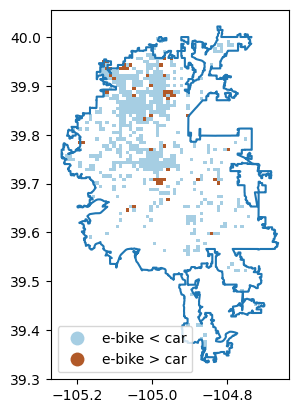

In [86]:
#denver (smart commute only!!)
ax = denver_boundary.boundary.plot()
denver_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
denver_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_162/889641816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boulder_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

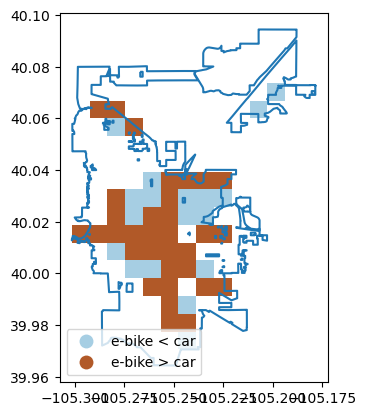

In [87]:
#boulder
ax = boulder_boundary.boundary.plot()
boulder_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
boulder_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_162/411610175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fort_collins_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

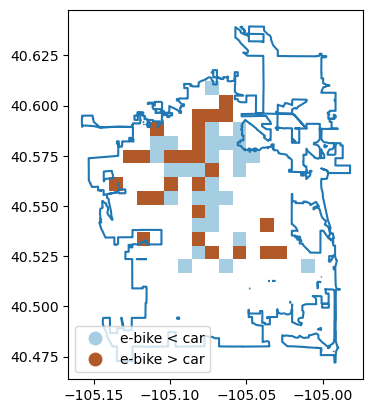

In [88]:
#fort collins
ax = fort_collins_boundary.boundary.plot()
fort_collins_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
fort_collins_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_162/916428835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vail_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

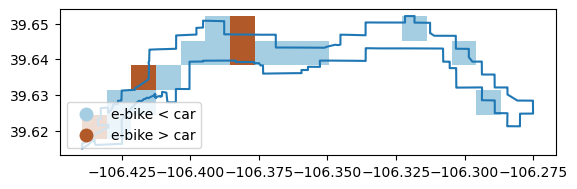

In [89]:
#vail
ax = vail_boundary.boundary.plot()
vail_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
vail_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_162/1153002758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durango_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

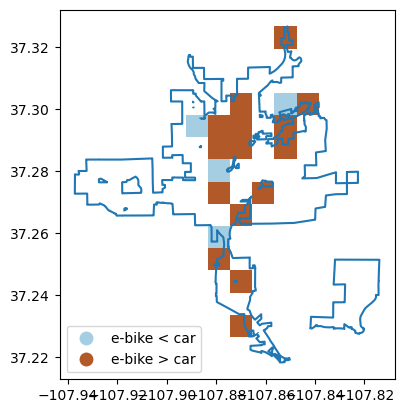

In [90]:
#durango
ax = durango_boundary.boundary.plot()
durango_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
durango_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

/tmp/ipykernel_162/4269633272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pueblo_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)


<Axes: >

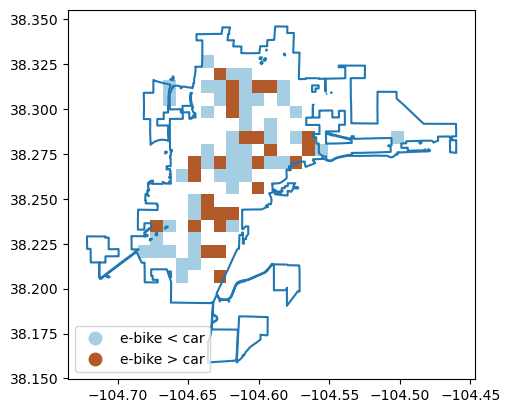

In [91]:
#pueblo
ax = pueblo_boundary.boundary.plot()
pueblo_pixels_2.replace({False: "e-bike < car", True: "e-bike > car"}, inplace=True)
pueblo_pixels_2.plot(column = "e_bike_better", ax = ax, legend=True, legend_kwds={"loc": "lower left"}, categorical=True, cmap="Paired", figsize=(12,6))

# Pixel Proportions

In [180]:
denver = denver_pixels_2.dropna().groupby("e_bike_better").count()
boulder = boulder_pixels_2.dropna().groupby("e_bike_better").count()
collins = fort_collins_pixels_2.dropna().groupby("e_bike_better").count()
durango = durango_pixels_2.dropna().groupby("e_bike_better").count()
vail = vail_pixels_2.dropna().groupby("e_bike_better").count()
pueblo = pueblo_pixels_2.dropna().groupby("e_bike_better").count()

In [181]:
denver['Smart Commute\n(Denver North)'] = denver['id'] / sum(denver['id'])
# denver['program'] = 'Smart Commute\n(Denver North)'
boulder['Comunity Cycles\n(Boulder)'] = boulder['id'] / sum(boulder['id'])
# boulder['program'] = 'Comunity Cycles\n(Boulder)'
collins['Fort Collins'] = collins['id'] / sum(collins['id'])
# collins['program'] = 'Fort Collins'
durango['Four Corners\n(Durango)'] = durango['id'] / sum(durango['id'])
# durango['program'] = 'Four Corners\n(Durango)'
vail['Vail'] = vail['id'] / sum(vail['id'])
# vail['program'] = 'Vail'
pueblo['Pueblo'] = pueblo['id'] / sum(pueblo['id'])
# pueblo['program'] = 'Pueblo'

pixels = pd.concat([denver, boulder, collins, durango, vail, pueblo], axis = 1)

pixels = pixels.drop(columns = ['id', 'geometry', 'left', 'top', 'right', 'bottom', 'all_trip_count', 'e_bike_trip_count', 'car_like_trip_count', 'e_bike_2_car_like'])

pixels = pixels.transpose()

pixels

e_bike_better,e-bike < car,e-bike > car
Smart Commute\n(Denver North),0.920509,0.079491
Comunity Cycles\n(Boulder),0.352941,0.647059
Fort Collins,0.527273,0.472727
Four Corners\n(Durango),0.210526,0.789474
Vail,0.764706,0.235294
Pueblo,0.644737,0.355263


[Text(0, 0, 'Smart Commute\n(Denver North)'),
 Text(1, 0, 'Comunity Cycles\n(Boulder)'),
 Text(2, 0, 'Fort Collins'),
 Text(3, 0, 'Four Corners\n(Durango)'),
 Text(4, 0, 'Vail'),
 Text(5, 0, 'Pueblo')]

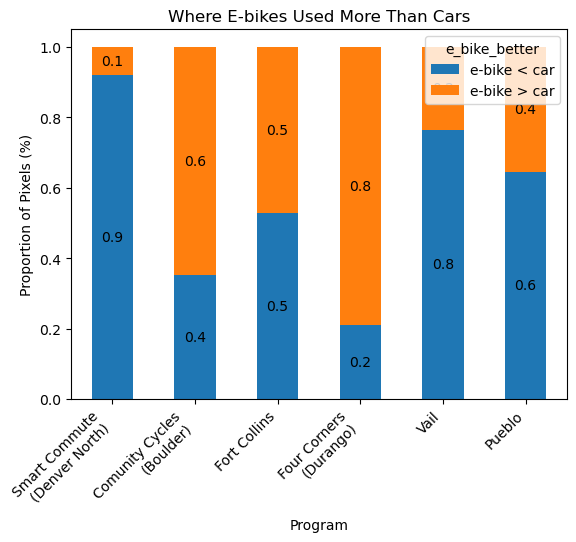

In [182]:
ax = pixels.plot.bar(stacked=True,
                            title="Where E-bikes Used More Than Cars", 
                            ylabel="Proportion of Pixels (%)",
                            xlabel = "Program",)
for c in ax.containers:
    labels = [f'{round(v.get_height(),1)}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')
    
ax.set_xticklabels(pixels.index, rotation=45, ha='right')